## Практика 2

In [204]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [205]:
# Присвоим переменной «url» ссылку на датасет:

df = pd.read_csv('D:/Git/ml_data.mining/data/Churn_Modelling.csv')


## Анализ данных 

In [206]:
df.shape

(10002, 14)

In [207]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [208]:
import mpl_toolkits.mplot3d  # noqa: F401


from sklearn import datasets
from sklearn.cluster import KMeans

In [209]:
# Метод Pandas info()  выводит очень много информации о наборе данных - количество записей,
# количество ненулевых значений в каждом столбце, тип данных в столбце

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [210]:
del df['Surname']
del df['Geography']
del df['Gender']

In [211]:
# Pandas describe() используется для просмотра  основной статистической информации, таких как процентиль, среднее,
# стандартное отклонение и т.д. фрейма данных или ряда числовых значений:

df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [212]:
df.isnull().sum()

RowNumber          0
CustomerId         0
CreditScore        0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [213]:
df['HasCrCard'].unique()

array([ 1.,  0., nan])

In [214]:
df.HasCrCard = df.HasCrCard.fillna(df.HasCrCard.min())
df.HasCrCard.describe()

count    10002.000000
mean         0.705459
std          0.455859
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HasCrCard, dtype: float64

In [215]:
df.Age = df.Age.fillna(df.Age.median())
df.IsActiveMember = df.IsActiveMember.fillna(df.IsActiveMember.median())

In [216]:
df['HasCrCard'].value_counts()

HasCrCard
1.0    7056
0.0    2946
Name: count, dtype: int64

In [217]:
# from sklearn.preprocessing import MinMaxScaler  # StandardScaler

# scaler_mm = MinMaxScaler()

# df[['mmAge', 'mmCreditScore', 'mmBalance', 'mmEstimatedSalary']] = scaler_mm.fit_transform(df[['Age', 'EstimatedSalary', 'CreditScore', 'Balance']])
# df.head()

In [218]:
# del df['Age']
# del df['EstimatedSalary']
# del df['CreditScore']
# del df['Balance']

## Визуализация данных 

In [219]:
# Преобразование столбца HasCrCard
df['HasCrCard'] = df['HasCrCard'].map({0: 'No', 1: 'Yes'})

In [220]:
df.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42.0,2,0.00,1,Yes,1.0,101348.88,1
1,2,15647311,608,41.0,1,83807.86,1,No,1.0,112542.58,0
2,3,15619304,502,42.0,8,159660.80,3,Yes,0.0,113931.57,1
3,4,15701354,699,39.0,1,0.00,2,No,0.0,93826.63,0
4,5,15737888,850,43.0,2,125510.82,1,No,1.0,79084.10,0


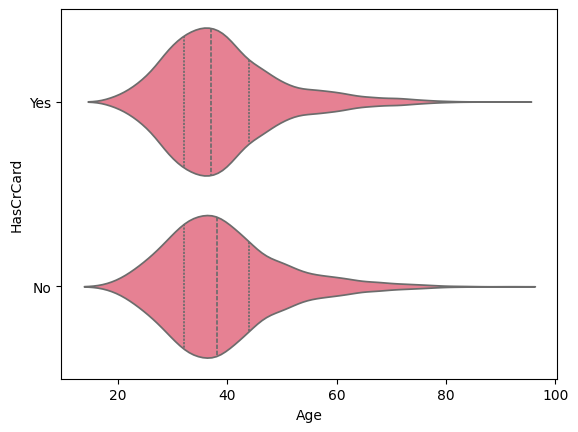

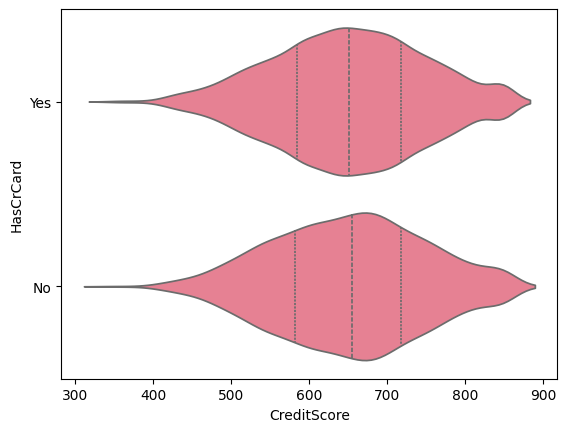

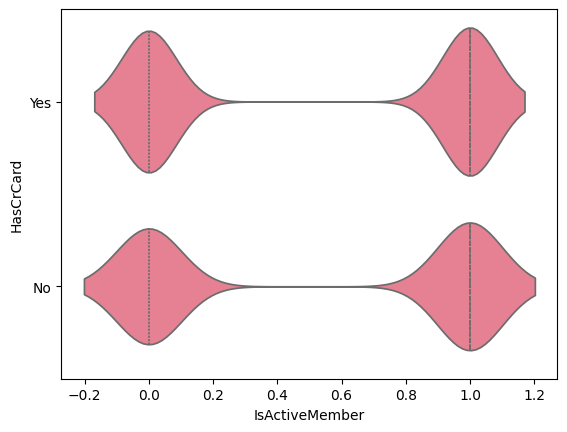

In [221]:
# Скрипичный график.
# Используется для проверки сравнения распределения переменных:

sns.violinplot(y='HasCrCard', x='Age', data=df, inner='quartile')
plt.show()
sns.violinplot(y='HasCrCard', x='CreditScore', data=df, inner='quartile')
plt.show()
sns.violinplot(y='HasCrCard', x='IsActiveMember', data=df, inner='quartile')
plt.show()
# sns.violinplot(y='HasCrCard', x='Gender', data=df, inner='quartile')
# plt.show()
# sns.violinplot(y='HasCrCard', x='Geography', data=df, inner='quartile')
# plt.show()


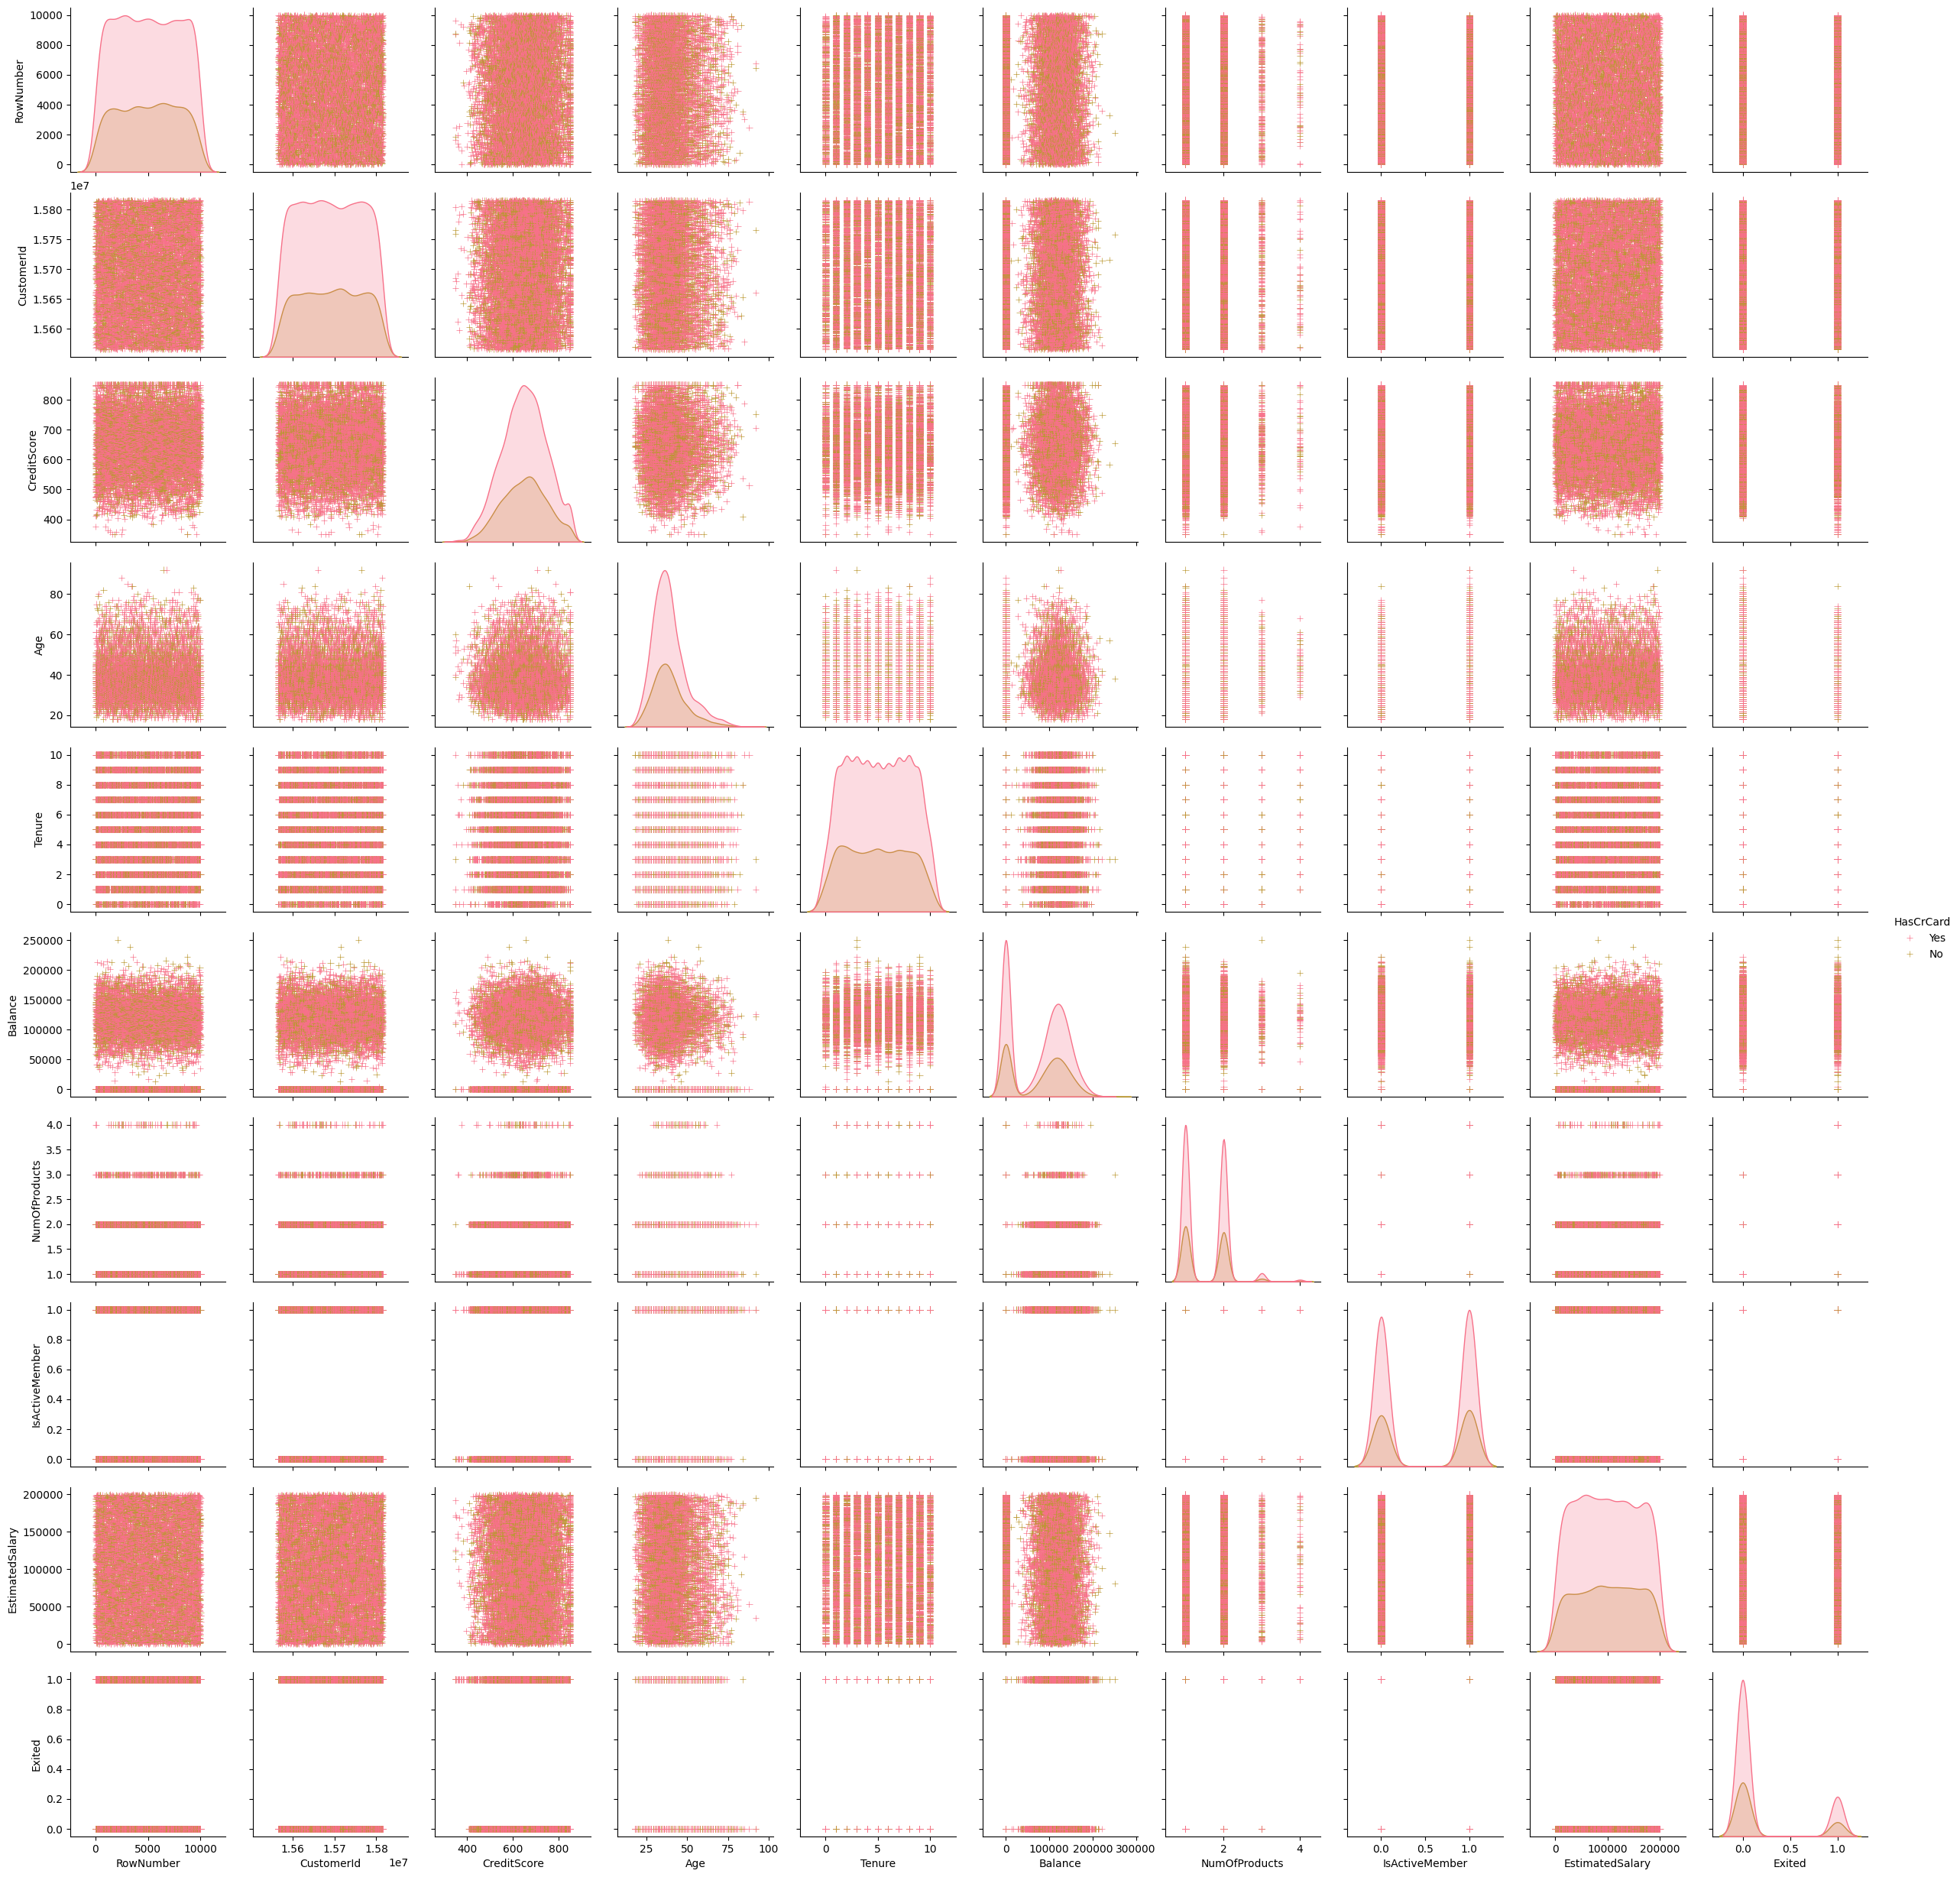

In [222]:
# Парный график
#Построение нескольких попарных двумерных распределений в наборе данных с помощью pairplot:

sns.pairplot(df, hue='HasCrCard', markers='+')
plt.show()

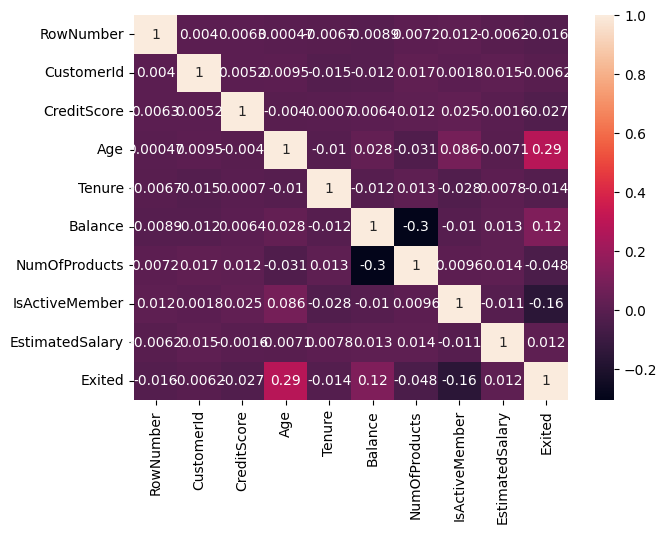

In [223]:
# Тепловая карта
# Построение тепловой карты для проверки корреляции.
# dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных.

plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only = True), annot=True)
plt.show()

# Построение модели

## Разделение набора данных

Y  - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих фич.  В нашем случае это столбец class.

В X складываем весь набор данных без целевой переменной.

In [224]:
X = df.drop(['HasCrCard'], axis=1)
y = df['HasCrCard']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (10002, 10) | y shape: (10002,) 


## Train Test разделение

Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:

In [225]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [226]:
import scipy.stats as stats

y_mapped = y.map({'No': 0, 'Yes': 1})

# почему важно перемешивать и делать train и test статистически не различимыми по целевой переменной
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.20, shuffle=False)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=np.float64(-1.7205503742978996), pvalue=np.float64(0.08536338053410948), df=np.float64(10000.0))

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.20, random_state=15, stratify=y_mapped)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=np.float64(-0.020654732107975637), pvalue=np.float64(0.9835214919374011), df=np.float64(10000.0))

## Обучение и выбор оптимальной модели

Далее попробуем следующие алгоритмы:

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB)</br>
Support Vector Machines (SVM)</br>
[Справочная информация по классификаторам](https://colab.research.google.com/drive/12aLAEAtM5a3dWh-6UYj18ONeCuH_lGJ3?usp=sharing)

In [228]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  # print(cv_results)
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.705412 (0.000559)
LDA: 0.705412 (0.000559)
KNN: 0.636294 (0.014743)
CART: 0.575557 (0.016763)
NB: 0.705412 (0.000559)
SVC: 0.705412 (0.000559)


LinearDiscriminantAnalysis и Наивный Байесовский классификатор показали лучшие метрики среди всех алгоритмов.
Далее работаем с LinearDiscriminantAnalysis.

Давайте обучим модель LDA на нашем обучающем наборе и сделаем прогноз на тестовом наборе на следующем шаге.

## Обучение конкретной модели
Определяем нашу модель LDA
После этого подгоняем/обучаем модель на X_train и Y_train с помощью метода .fit().
Затем мы делаем прогноз на X_test с помощью метода .predict().

In [229]:
sk_lda = LinearDiscriminantAnalysis(solver='eigen')
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')
print('sk transformed features', sk_transformed[:5].T, sep='\n')

sk LDA accuracy: 0.7056471764117941
sk LDA prediction: [1 1 1 ... 1 1 1]
sk transformed features
[[-92.36763378 -92.84910405 -92.29016293 -90.3837496  -94.18118733]]


## Визуализация решения

<Axes: title={'center': 'LDA surface with original features'}>

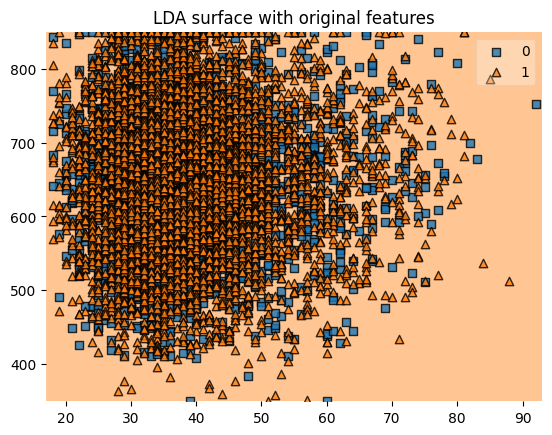

In [230]:
from mlxtend.plotting import plot_decision_regions

# Создадим целевой вектор y_2d
# Преобразуем классы к классам 0, 1, 2 соответственно
#y_s = y_train.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
y_s = y_train
X_2d= X_train[['Age',	'CreditScore']].values

y_2d = y_s.values


sk_lda1 = LinearDiscriminantAnalysis(solver='eigen')
sk_lda1.fit(X_2d, y_2d)

plt.title('LDA surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)

In [231]:
data = df["HasCrCard"].map({'No': 0, 'Yes': 1})

Xs = df[['Age',	'CreditScore']]
ys = df.values

sk_lda2 = LinearDiscriminantAnalysis(solver='eigen')
X1_lda = sk_lda2.fit(X, ys).transform(X)

Xs = X1_lda

X1_lda_train, X1_lda_test, y1_train, y1_test = train_test_split(X1_lda, ys, random_state=0)

sk_lda2.fit(X1_lda_train, y1_train)

plt.title('LDA surface with transformed features')
plot_decision_regions(X=X1_lda, y=ys, clf=sk_lda2)

ValueError: y should be a 1d array, got an array of shape (10002, 11) instead.

In [ ]:
predicted = sk_lda2.predict(X1_lda_test)

In [ ]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## Accuray e AUC
'''
Теперь смотрим метрики.
НА ТЕСТОВОМ ДАТАСЕТЕ
'''
accuracy = metrics.accuracy_score(y1_test, predicted)#Оценим точность классификации.

'''
Получим результат
'''

## Precision e Recall
recall = metrics.recall_score(y1_test, predicted, average="weighted")
precision = metrics.precision_score(y1_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y1_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

NameError: name 'y1_test' is not defined